In [1]:
import uproot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import scipy.signal as spsig


In [2]:
df_w = pd.read_pickle("../09Nov/09Nov2021_testBeam_muons_1p2GSPS_HVnominal_5k_angle0_newTgr.pkl")
df_w = -(df_w)

In [3]:
def fft_pandas(d):
    f_s = 1.2e9
    dt = 1/f_s
    
    size = 1024
        
    ## DFT using numpy routine
    
    x  = np.linspace(0.0,size*dt, size)
    yf = np.fft.fft(d)
    xf = np.fft.fftfreq(size, dt)
    xf = np.fft.fftshift(xf)
    print(xf)
    yplot = np.fft.fftshift(yf)
    ## Power Spectrum
    spectrum = np.abs(yplot)**2
    return spectrum

def ampl(w):
    relmin = spsig.argrelmax(w,order=1024)
    ampl = w[relmin[0]]
    return ampl


In [ ]:
s = df_w.ch6

In [4]:
#s.map(lambda x: ampl(np.array(x)))
chs_1cm = ["ch4", "ch5", "ch6", "ch7", "ch8", "ch9"]
chs_3cm = ["ch13", "ch14"]
chs_2cm = ["ch10", "ch11", "ch12"]
cha_all = chs_1cm + chs_2cm + chs_3cm
for ch in df_w.columns:
    if cha_all.count(ch):
        print(ch)
        df_w[f"{ch}_ampl"] = df_w[ch].map(lambda x: np.array(x).max())
        df_w[f"{ch}_int"] = df_w[ch].map(lambda x: np.array(x).sum())
        #df_w[f"{ch}_baseline"] = df_w[ch].map(lambda x: x.sum()*0.01)
        df_w[f"{ch}_rms"] = df_w[ch].map(lambda x: np.sqrt(np.square(np.array(x)).mean() - np.square(np.array(x).mean())))

ch4
ch5
ch6
ch7
ch8
ch9
ch10
ch11
ch12
ch13
ch14


In [7]:
import scipy.stats as stat


In [9]:
import scipy.signal as spsig
from matplotlib import figure

def plotSigInEvent(eventNumber = 0):
    channel_map_color = {
     "ch0" : "b",
     "ch1" : "b",
     "ch2" : "b",
     "ch3" : "b",
     "ch4" : "black",
     "ch5" : "black",
     "ch6" : "black",
     "ch7" : "black",
     "ch8" : "black",
     "ch9" : "black",
     "ch10" : "maroon",
     "ch11" : "maroon",
     "ch12" : "maroon",
     "ch13" : "darkorange",
     "ch14" : "darkorange",
     "ch15" : "darkorange"
    }
    if (eventNumber > df_w.shape[0]):
        print("Event Number out of range")
        return -90
    fig = figure.Figure(figsize=(24,20))
    axs = fig.subplots(4,4)  #, sharex="all", sharey="all")
    for ch in np.arange(0,15):
        Row = int(ch / 4)
        Column = ch % 4
        ax = axs[Row][Column]
        
        w = np.array(df_w[f"ch{ch}"][eventNumber])
        t = np.linspace(0,8.5e-7,1024)
        #w[1:-1]
        
        relmin = spsig.argrelmax(w,order=1022)
        integral = w.sum()
        baseline = integral *0.01
        rms = np.sqrt(np.square(w).mean() - np.square(w.mean()))
        print(ch)
        print(integral)
        print(rms)
        print(w[relmin[0]])
        _ = ax.plot(t,w, channel_map_color[f"ch{ch}"])
        ax.plot(t[relmin[0]],w[relmin[0]],'or')
        ax.set_ylim(-0.05,0.20)
        ax.tick_params(direction='in', length=6, width=1.1, colors='k',
                      grid_color='k', which='major')
        ax.tick_params(direction='in', length=3, width=1, colors='k',
                      grid_color='k', which='minor')
        ax.grid(ls='--',color='grey')

    return fig

0
19.705368041992188
0.007437613179760025
[0.08544922]
1
23.537567138671875
0.010728590778313686
[0.13240051]
2
20.265533447265625
0.012041215300445681
[0.16148376]
3
37.32318115234375
0.021845187436750468
[0.27018738]
4
7.3038177490234375
0.015101419632137373
[0.13128662]
5
5.976318359375
0.00841945867501026
[0.08369446]
6
5.3301239013671875
0.00502632345853197
[0.05647278]
7
6.4376678466796875
0.009040317702849132
[0.10188293]
8
5.8280029296875
0.005465088354166505
[0.0489502]
9
5.6246795654296875
0.0042408449417985095
[0.02668762]
10
4.845794677734375
0.0015447153145624686
[0.00976562]
11
5.191864013671875
0.0016589724703884258
[0.01029968]
12
5.32452392578125
0.001436099550989963
[0.01063538]
13
5.0457763671875
0.002082821592386025
[0.01345825]
14
5.190277099609375
0.0013750306717290653
[0.00932312]


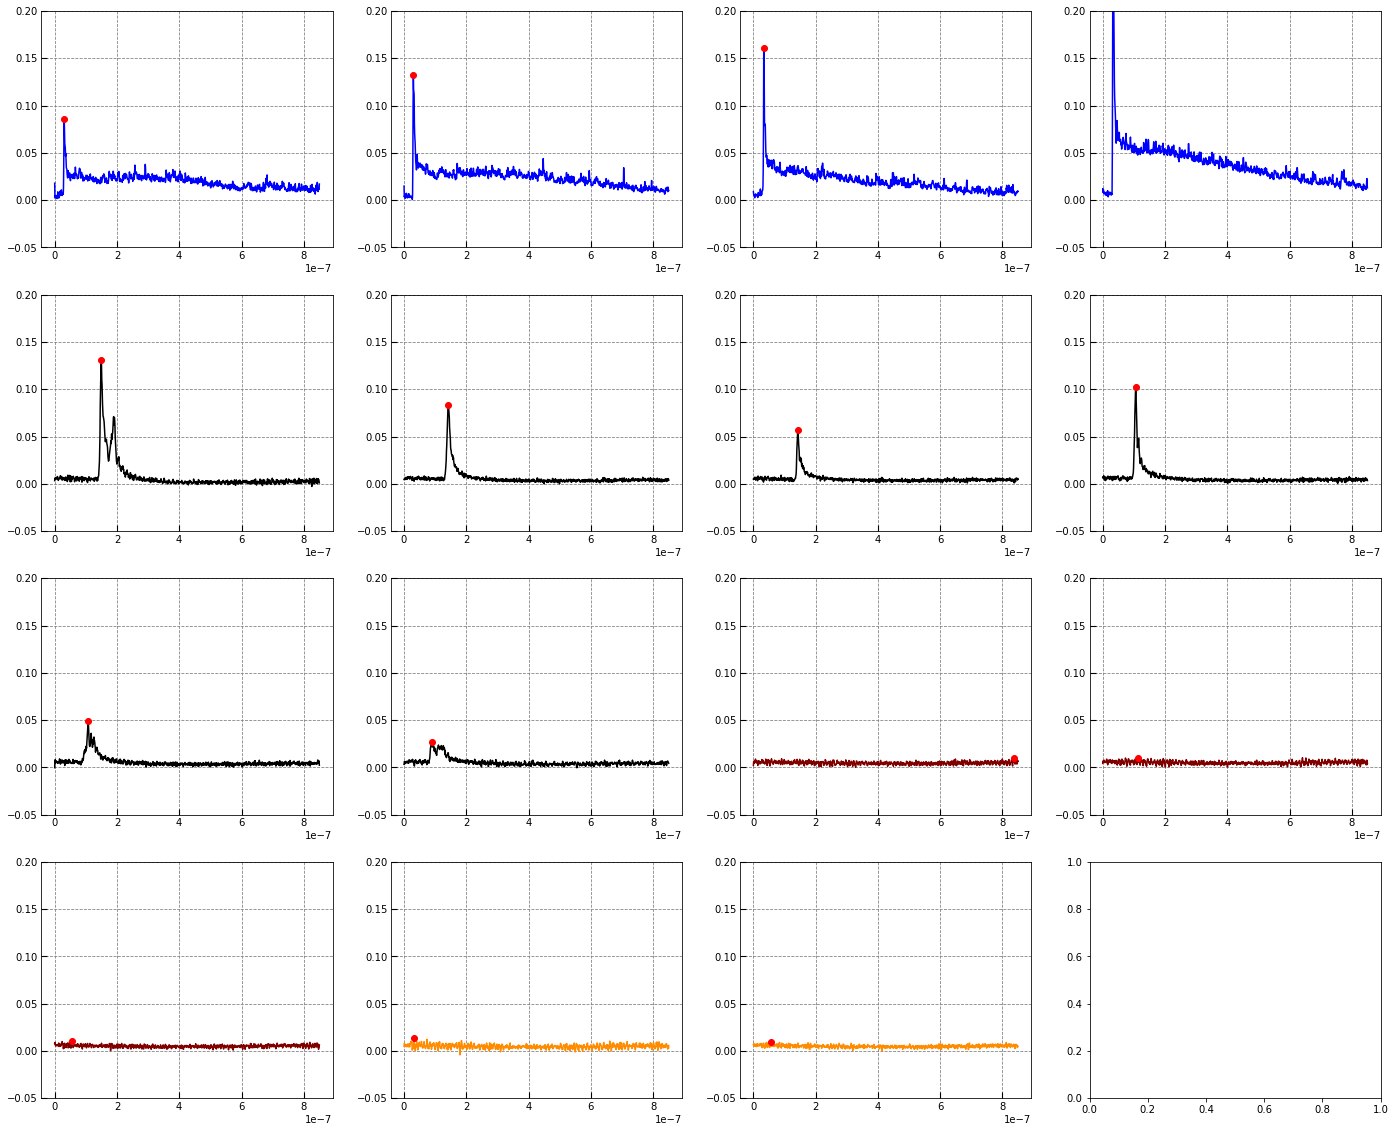

In [10]:
plotSigInEvent(5)

In [ ]:
ampl_mask = df_w.ch6_ampl > 5e-3
plt.hist(df_w.ch6_int.to_numpy() - df_w.ch6_int.to_numpy()*0.01, histtype="step", bins=np.linspace(-10,20,50));
plt.hist(df_w.ch6_int.to_numpy(), histtype="step", bins=np.linspace(-10,20,50));
plt.hist(df_w.ch6_int.to_numpy()[ampl_mask], histtype="step", bins=np.linspace(-10,20,50));
#plt.hist(df_w.ch6_int.to_numpy()*0.01, histtype="step", bins=np.linspace(-10,20,50), log=True);

In [ ]:
plt.hist(df_w.ch6_rms.to_numpy(), bins=np.linspace(-0.05,0.1,30), histtype="step", log=True);

## Fitting a Landau

Landau aproximation by Moyal distribution

This distribution has utility in high-energy physics and radiation detection. **It describes the energy loss of a charged relativistic** particle due to ionization of the medium [1]. It also provides an approximation for the Landau distribution. For an in depth description see [2]. For additional description, see [3].

1. J.E. Moyal, “XXX. Theory of ionization fluctuations”, The London, Edinburgh, and Dublin Philosophical Magazine and Journal of Science, vol 46, 263-280, (1955). DOI:10.1080/14786440308521076 (gated)

2. G. Cordeiro et al., “The beta Moyal: a useful skew distribution”, International Journal of Research and Reviews in Applied Sciences, vol 10, 171-192, (2012). http://www.arpapress.com/Volumes/Vol10Issue2/IJRRAS_10_2_02.pdf

3. C. Walck, “Handbook on Statistical Distributions for Experimentalists; International Report SUF-PFY/96-01”, Chapter 26, University of Stockholm: Stockholm, Sweden, (2007). http://www.stat.rice.edu/~dobelman/textfiles/DistributionsHandbook.pdf


### Landau define as

$$
A*\text{Moyal}(x, B, C)
$$

B is the scale of the peak. See the code for more details

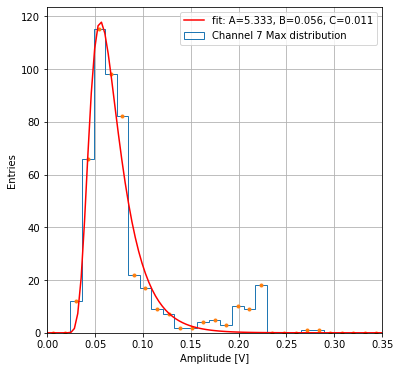

In [100]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html#scipy-optimize-curve-fit
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.moyal.html#scipy.stats.moyal
import scipy.optimize as optimizer
import scipy.stats as stat

def landau(x, A, B, C):
    return A* stat.moyal.pdf(x, B, C)

mask_baseline = df_w.ch7.map(lambda x: np.array(x[1:-1]).max()) > 0.03
df_series_max = df_w.ch7.map(lambda x: np.array(x[1:-1]).max())


alpha = 4
loc = 0.058
scale = 7e-3

fig = plt.figure(figsize=(6,6))

# Plot histogram
yval, xval, p = plt.hist(df_series_max[mask_baseline], bins=np.linspace(0,0.35,30), histtype="step", label="Channel 7 Max distribution")
plt.plot(xval[:-1]+(xval[1]/2),yval, '.')
#plt.plot(np.linspace(0,0.35,50), landau(np.linspace(0,0.35,50), alpha, loc, scale),'r-')

# Fitting to Landau
popt, popc = optimizer.curve_fit(landau,  xval[:-1]+(xval[1]/2), yval, p0=[alpha, loc, scale])
# Plot Landau
plt.plot(np.linspace(0,0.35,100), landau(np.linspace(0,0.35,100), *popt), 'r-',
         label='fit: A=%5.3f, B=%5.3f, C=%5.3f' % tuple(popt))
plt.xlabel('Amplitude [V]')
plt.ylabel('Entries')
plt.legend()

plt.xlim(0,0.35)
plt.grid()

(array([5.33298966, 0.05551408, 0.01093507]),
 array([[6.50940233e-02, 4.39066466e-05, 1.06107774e-04],
        [4.39066466e-05, 7.20654420e-07, 1.77453332e-07],
        [1.06107774e-04, 1.77453332e-07, 4.42140133e-07]]))

5000 5000
ch4 0
625 5000
5000 5000
ch5 1
609 5000
5000 5000
ch6 2
621 5000
5000 5000
ch7 3
632 5000
5000 5000
ch8 4
622 5000
5000 5000
ch9 5
677 5000


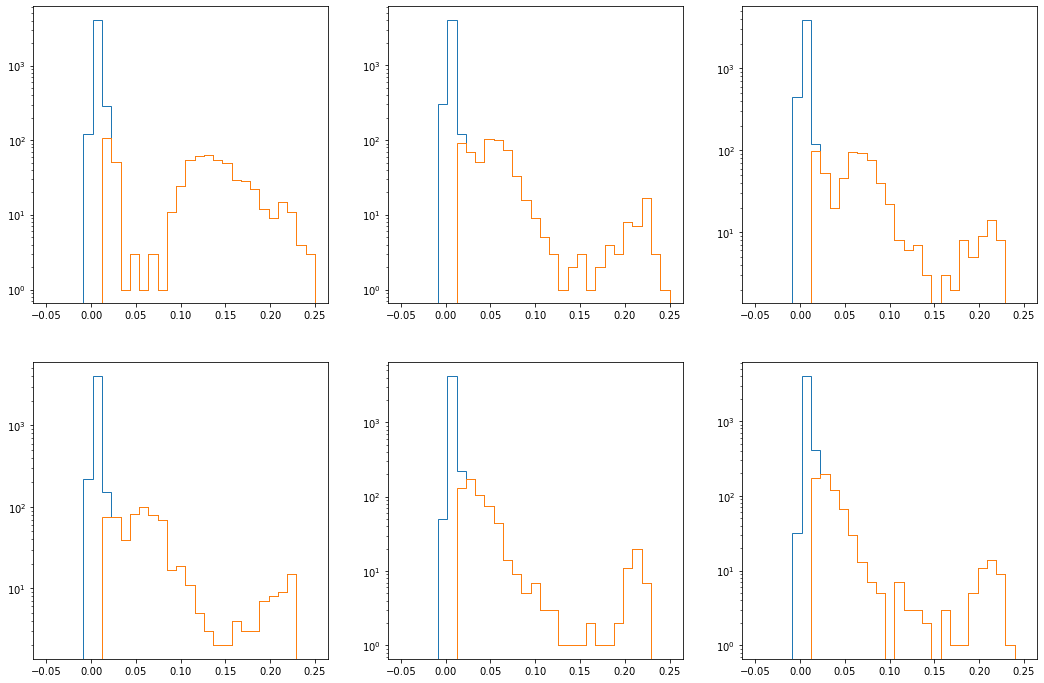

In [11]:
chs_1cm = ["ch4", "ch5", "ch6", "ch7", "ch8", "ch9"]
chs_3cm = ["ch13", "ch14"]
chs_2cm = ["ch10", "ch11", "ch12"]

fig = plt.figure(figsize=(18,12))
axs = fig.subplots(2,3)  #, sharex="all", sharey="all")

for num, ch in enumerate(chs_1cm):
    Row = int(num / 3)
    Column = num % 3
    ax = axs[Row][Column]
    
    mask_baseline = df_w[ch].map(lambda x: np.array(x[1:-1]).max()) > 0.015
    df_series_max = df_w[ch].map(lambda x: np.array(x[1:-1]).max())
    int_ch = df_w[ch].map(lambda x: np.array(x[1:-1]).sum())
    print(len(mask_baseline), len(int_ch))
    ax.hist(df_series_max, bins=np.linspace(-0.05,0.25,30), histtype="step", log=True);
    ax.hist(df_series_max[mask_baseline], bins=np.linspace(-0.05,0.25,30), histtype="step", log=True);
    #ax.hist(int_ch, histtype="step", bins=np.linspace(-10,30,50), log=True);
    #ax.hist(int_ch[mask_baseline], histtype="step", bins=np.linspace(-10,30,50), log=True);
    print(ch, num)
    print(len(df_series_max[mask_baseline]), len(df_series_max))
plt.show()

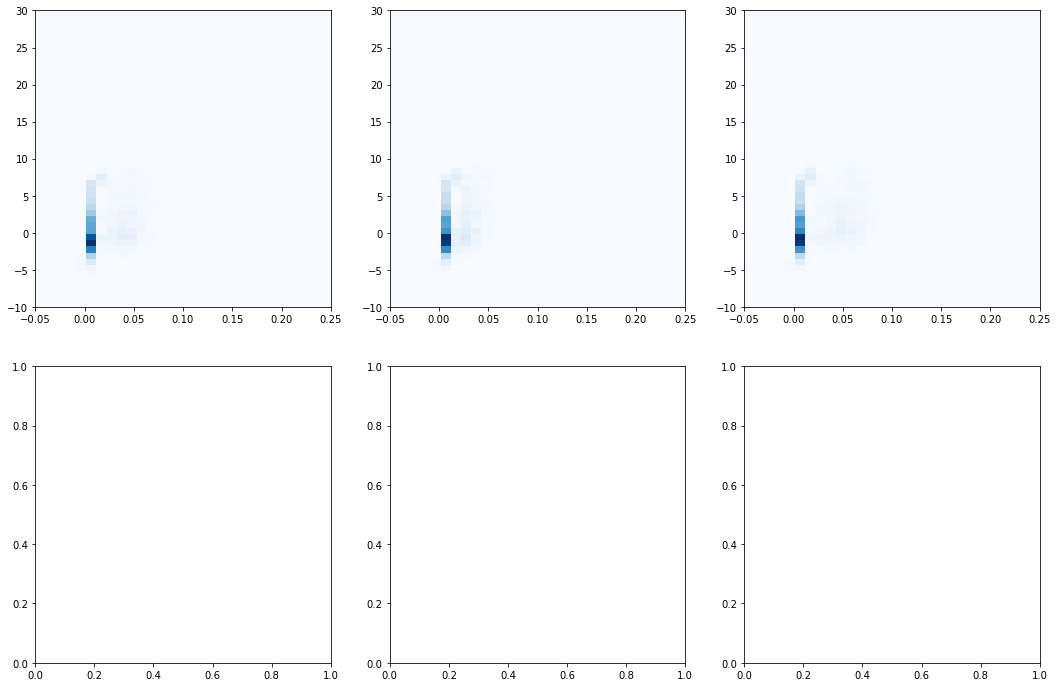

In [30]:
fig = plt.figure(figsize=(18,12))
axs = fig.subplots(2,3)  #, sharex="all", sharey="all")

for num, ch in enumerate(chs_2cm):
    Row = int(num / 3)
    Column = num % 3
    ax = axs[Row][Column]
    
    mask_baseline = df_w[ch].map(lambda x: np.array(x[1:-1]).max()) > 0.015
    df_series_max = df_w[ch].map(lambda x: np.array(x[1:-1]).max())
    int_ch = df_w[ch].map(lambda x: np.array(x[1:-1]).sum())
    #ax.hist(df_series_max, bins=np.linspace(-0.05,0.25,30), histtype="step", log=True);
    #ax.hist(df_series_max[mask_baseline], bins=np.linspace(-0.05,0.25,30), histtype="step", log=True);
    ax.hist2d(df_series_max, int_ch, bins=[np.linspace(-0.05,0.25,30), np.linspace(-10,30,50)],cmap="Blues");
    #ax.hist(int_ch[mask_baseline], histtype="step", bins=np.linspace(-10,30,50), log=True);


In [42]:
df_w.ch4[df_w.ch5_int >10]

71      [0.0085296630859375, 0.006195068359375, 0.0041...
1769    [0.0946197509765625, -0.0004730224609375, 0.00...
Name: ch4, dtype: object

0
-1.4847564697265625
0.13741773767583104
[]
1
-6.695404052734375
0.11640548574204178
[0.5]
2
2.7877197265625
0.08650458211893396
[0.40463257]
3
2.29241943359375
0.07293991634727996
[0.5]
4
10.7098388671875
0.12737131896190626
[]
5
10.792068481445312
0.05709856628710974
[0.24102783]
6
10.290603637695312
0.05870055276176727
[0.18130493]
7
10.704193115234375
0.05561381754110151
[0.17225647]
8
10.876373291015625
0.05727558009890959
[0.16920471]
9
11.104644775390625
0.11663885878960178
[]
10
10.981460571289062
0.13758359158464442
[]
11
12.721542358398438
0.183138288301142
[]
12
11.073226928710938
0.14252689961092188
[]
13
12.205062866210938
0.17751199160075806
[]
14
11.231948852539062
0.1341373349419311
[0.5]


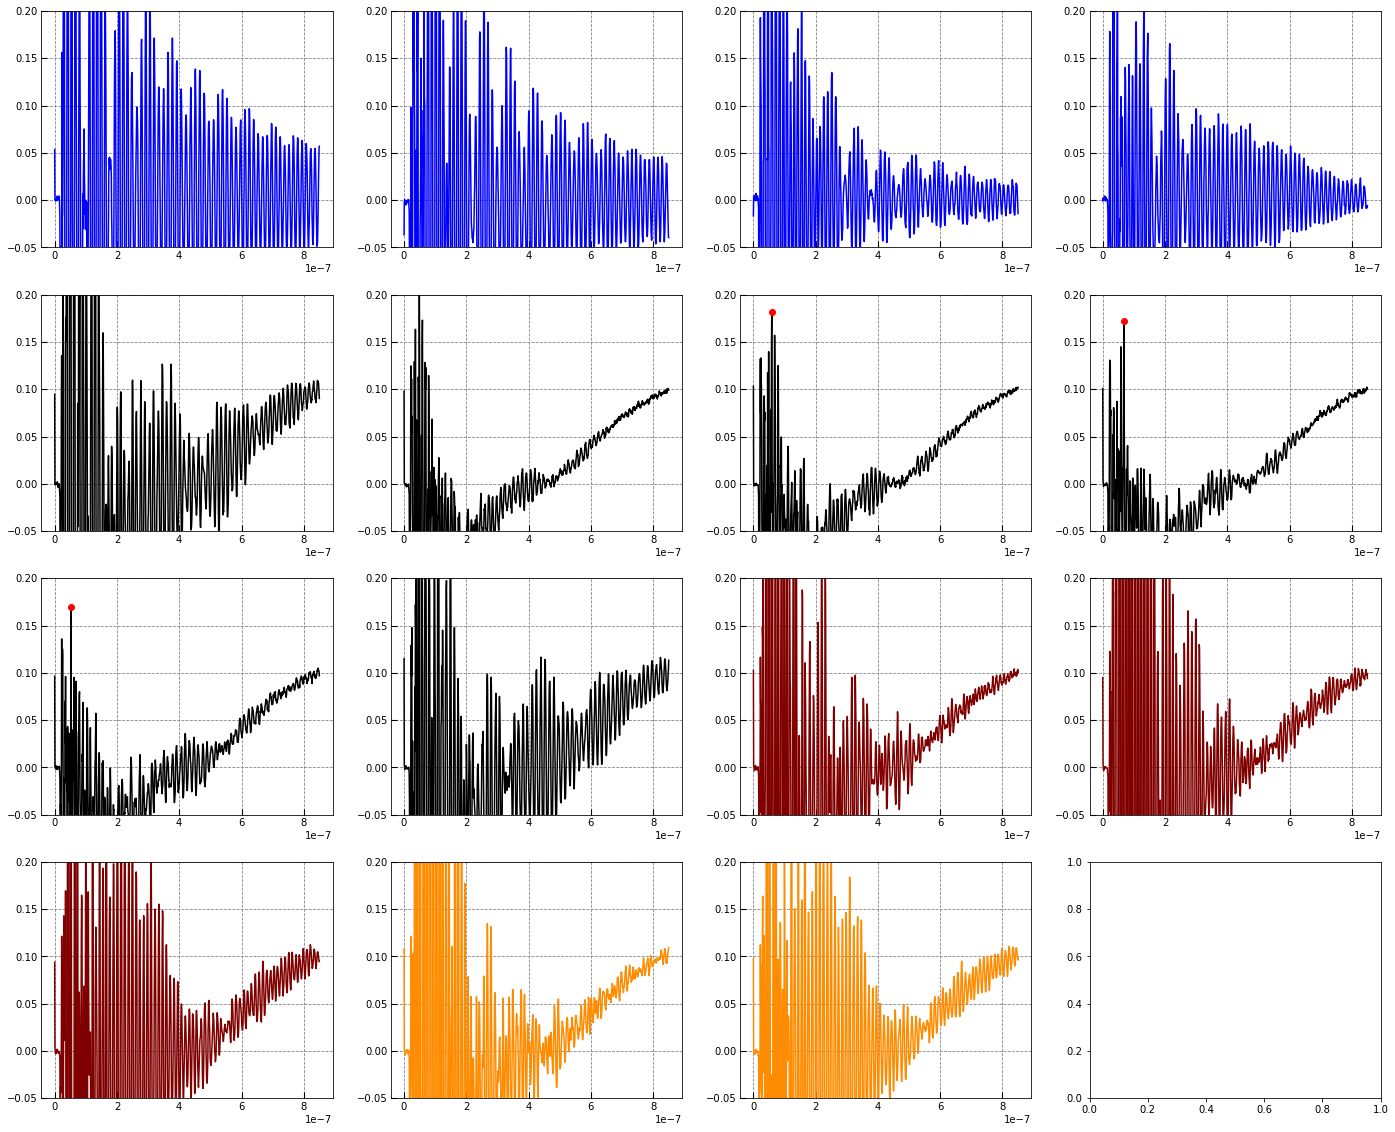

In [44]:
plotSigInEvent(1769)

In [ ]:
def ampl(w):
    relmin = spsig.argrelmax(w,order=800, mode="clip")
    ampl = w[relmin[0]]
    return ampl


In [ ]:
df_w.ch6[:10].map(lambda x: ampl(np.array(x[10:-10])))
df_w.ch6[:10].map(lambda x: np.array(x[10:-10]).max())

In [ ]:
df_w_noise = pd.read_pickle("./Noise/08Nov2021_noiseRun_HV500_cosmincs_carroponte_on.pkl")
df_w_noise = -(df_w_noise-0.450)

In [ ]:
chs_1cm = ["ch4", "ch5", "ch6", "ch7", "ch8", "ch9"]
chs_3cm = ["ch13", "ch14"]
chs_2cm = ["ch10", "ch11", "ch12"]

fig = plt.figure(figsize=(18,12))
axs = fig.subplots(2,3)  #, sharex="all", sharey="all")

for num, ch in enumerate(chs_1cm):
    Row = int(num / 3)
    Column = num % 3
    ax = axs[Row][Column]
    
    mask_baseline = df_w_noise[ch].map(lambda x: np.array(x[1:-1]).max()) > 0.01
    df_series_max = df_w_noise[ch].map(lambda x: np.array(x[1:-1]).max())
    int_ch = df_w_noise[ch].map(lambda x: np.array(x[1:-1]).sum())
    print(len(mask_baseline), len(int_ch))
    #ax.hist(df_series_max, bins=np.linspace(-0.05,0.5,30), histtype="step", log=True);
    #ax.hist(df_series_max[mask_baseline], bins=np.linspace(-0.05,0.5,30), histtype="step", log=True);
    #ax.hist(int_ch, histtype="step", bins=np.linspace(-10,30,50), log=True);
    ax.hist(int_ch, histtype="step", bins=np.linspace(-10,30,50), log=True);
    print(ch, num)
    print(len(df_series_max[mask_baseline]), len(df_series_max))
plt.show()

In [ ]:
int_noise = df_w_noise.ch6.sum()
df_noise_max = df_w_noise.ch6.map(lambda x: np.array(x[1:-1]).max())
plt.hist(df_noise_max, histtype="step", bins=np.linspace(-0.1,0.1,20), log=True)

In [ ]:
df_w_noise.ch6